# importing Required Libraries

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
#Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Read the csv file

In [7]:
df=pd.read_csv('/kaggle/input/motor-vehicle/Motor_Vehicle_Collisions_-_Crashes.csv')

In [8]:
'''
Typical Columns in a Motor Vehicle Collisions Dataset:
1.CRASH DATE:
Date when the crash occurred.
2.CRASH TIME:
Time of day when the crash occurred.
3.BOROUGH:
Borough (or district) in which the crash took place.
4.ZIP CODE:
ZIP code of the location where the crash occurred.
5.ON STREET NAME:
Name of the street where the crash occurred.
6.CROSS STREET NAME:
Name of the cross street at the location of the crash.
7.NUMBER OF PERSONS INJURED:
Count of individuals injured in the crash.
8.NUMBER OF PERSONS KILLED:
Count of individuals killed in the crash.
9.NUMBER OF PEDESTRIANS INJURED:
Count of pedestrians injured in the crash.
10.NUMBER OF PEDESTRIANS KILLED:
Count of pedestrians killed in the crash.
11.NUMBER OF CYCLIST INJURED:
Count of cyclists injured in the crash.
12.NUMBER OF CYCLIST KILLED:
Count of cyclists killed in the crash.
13.NUMBER OF MOTORIST INJURED:
Count of motorists (vehicle occupants) injured in the crash.
14.NUMBER OF MOTORIST KILLED:
Count of motorists (vehicle occupants) killed in the crash.
15.CONTRIBUTING FACTOR VEHICLE 1 to CONTRIBUTING FACTOR VEHICLE 5:
Factors contributing to the crash (e.g., driver distraction, speeding, alcohol, etc.).
16.COLLISION_ID:
Unique identifier for the collision.
VEHICLE TYPE CODE 1 to VEHICLE TYPE CODE 5:
Types of vehicles involved in the crash (e.g., sedan, SUV, truck, bicycle, motorcycle, etc.)
'''

'\nTypical Columns in a Motor Vehicle Collisions Dataset:\n1.CRASH DATE:\nDate when the crash occurred.\n2.CRASH TIME:\nTime of day when the crash occurred.\n3.BOROUGH:\nBorough (or district) in which the crash took place.\n4.ZIP CODE:\nZIP code of the location where the crash occurred.\n5.ON STREET NAME:\nName of the street where the crash occurred.\n6.CROSS STREET NAME:\nName of the cross street at the location of the crash.\n7.NUMBER OF PERSONS INJURED:\nCount of individuals injured in the crash.\n8.NUMBER OF PERSONS KILLED:\nCount of individuals killed in the crash.\n9.NUMBER OF PEDESTRIANS INJURED:\nCount of pedestrians injured in the crash.\n10.NUMBER OF PEDESTRIANS KILLED:\nCount of pedestrians killed in the crash.\n11.NUMBER OF CYCLIST INJURED:\nCount of cyclists injured in the crash.\n12.NUMBER OF CYCLIST KILLED:\nCount of cyclists killed in the crash.\n13.NUMBER OF MOTORIST INJURED:\nCount of motorists (vehicle occupants) injured in the crash.\n14.NUMBER OF MOTORIST KILLED:\n

# First five rows of the data

In [9]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


# Gives the datatypes of the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081081 entries, 0 to 2081080
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

# Removing the unwanted columns

In [11]:
df.drop(['LATITUDE','LONGITUDE','LOCATION'],axis=1,inplace=True)

In [12]:
df.describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,2.081063e+06,2.081050e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06
mean,3.104620e-01,1.497321e-03,5.665277e-02,7.419221e-04,2.684614e-02,1.148442e-04,2.232864e-01,6.174676e-04,3.163852e+06
std,7.004309e-01,4.080669e-02,2.442584e-01,2.770054e-02,1.636427e-01,1.076067e-02,6.615695e-01,2.718710e-02,1.505282e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.156390e+06
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.676782e+06
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.197299e+06
max,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.717899e+06


In [13]:
df.describe(include='object')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,2081081,2081081,1433563,1433312.0,1638884,1293727,349824,2074244,1758014,148792,33616,9118,2067293,1682507,143386,32447,8839
unique,4306,1440,5,427.0,18440,20251,226869,61,61,51,41,30,1642,1826,262,102,71
top,01/21/2014,16:00,BROOKLYN,11207.0,BROADWAY,3 AVENUE,772 EDGEWATER ROAD,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan
freq,1161,28451,456115,20810.0,17277,9843,402,708137,1480124,138707,31708,8595,579207,405051,44632,10859,3071


In [14]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
skewness = numeric_columns.apply(skew)
skewness

NUMBER OF PERSONS INJURED              NaN
NUMBER OF PERSONS KILLED               NaN
NUMBER OF PEDESTRIANS INJURED     5.673404
NUMBER OF PEDESTRIANS KILLED     41.200349
NUMBER OF CYCLIST INJURED         6.094784
NUMBER OF CYCLIST KILLED         94.452185
NUMBER OF MOTORIST INJURED        5.116768
NUMBER OF MOTORIST KILLED        54.619428
COLLISION_ID                     -1.225409
dtype: float64

# Gives the sum of the null values

In [15]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           647518
ZIP CODE                          647769
ON STREET NAME                    442197
CROSS STREET NAME                 787354
OFF STREET NAME                  1731257
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6837
CONTRIBUTING FACTOR VEHICLE 2     323067
CONTRIBUTING FACTOR VEHICLE 3    1932289
CONTRIBUTING FACTOR VEHICLE 4    2047465
CONTRIBUTING FACTOR VEHICLE 5    2071963
COLLISION_ID                           0
VEHICLE TYPE CODE 1                13788
VEHICLE TYPE CODE 2               398574
VEHICLE TYPE CODE 3              1937695
VEHICLE TYPE COD

# gives the shape of the data

In [16]:
df.shape

(2081081, 26)

In [17]:
# Identify columns to drop
columns_to_drop = [
    'OFF STREET NAME',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
    'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
]

# Drop unwanted columns
df = df.drop(columns=columns_to_drop)

# dividing the CRASH DATE column into Month,Day,Day of the week

In [18]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month 
df['Day'] = df['CRASH DATE'].dt.day
df=df.drop(['CRASH DATE'],axis=1)

In [19]:
df.head()

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day
0,2:39,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,...,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,2021,9,11
1,11:45,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,...,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,2022,3,26
2,6:55,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,...,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,2022,6,29
3,9:35,BROOKLYN,11208.0,NaN,NaN,0.0,0.0,0,0,0,...,0,0,Unspecified,NaN,4456314,Sedan,NaN,2021,9,11
4,8:13,BROOKLYN,11233.0,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,0,...,0,0,NaN,NaN,4486609,NaN,NaN,2021,12,14


In [20]:
df.shape

(2081081, 21)

In [21]:
df['CROSS STREET NAME'].nunique()

20251

In [22]:
df.nunique()

CRASH TIME                          1440
BOROUGH                                5
ZIP CODE                             427
ON STREET NAME                     18440
CROSS STREET NAME                  20251
NUMBER OF PERSONS INJURED             32
NUMBER OF PERSONS KILLED               7
NUMBER OF PEDESTRIANS INJURED         14
NUMBER OF PEDESTRIANS KILLED           4
NUMBER OF CYCLIST INJURED              5
NUMBER OF CYCLIST KILLED               3
NUMBER OF MOTORIST INJURED            31
NUMBER OF MOTORIST KILLED              6
CONTRIBUTING FACTOR VEHICLE 1         61
CONTRIBUTING FACTOR VEHICLE 2         61
COLLISION_ID                     2081081
VEHICLE TYPE CODE 1                 1642
VEHICLE TYPE CODE 2                 1826
Year                                  13
Month                                 12
Day                                   31
dtype: int64

In [23]:
#Finding Numerical Columns
numeric_cols=[]
for col in df.columns:
    if(df[col].dtypes!='object'):
        numeric_cols.append(col)
print(f"There are total {len(numeric_cols)} numerical columns in dataset")
print(numeric_cols)

There are total 12 numerical columns in dataset
['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'Year', 'Month', 'Day']


In [24]:
#Finding Numerical Columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} numerical columns in dataset")
print(cat_col)

There are total 9 numerical columns in dataset
['CRASH TIME', 'BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']


In [25]:
df['CONTRIBUTING FACTOR VEHICLE 1'].nunique()

61

In [26]:
df.columns

Index(['CRASH TIME', 'BOROUGH', 'ZIP CODE', 'ON STREET NAME',
       'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'Year', 'Month', 'Day'],
      dtype='object')

In [27]:
df.isnull().sum()

CRASH TIME                            0
BOROUGH                          647518
ZIP CODE                         647769
ON STREET NAME                   442197
CROSS STREET NAME                787354
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6837
CONTRIBUTING FACTOR VEHICLE 2    323067
COLLISION_ID                          0
VEHICLE TYPE CODE 1               13788
VEHICLE TYPE CODE 2              398574
Year                                  0
Month                                 0
Day                                   0
dtype: int64

# Bivariat Analysis

In [28]:
y=df.groupby(['BOROUGH'])[['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']].sum()

In [29]:
y

,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED
BOROUGH,,,,
BRONX,278.0,135,25,109
BROOKLYN,627.0,336,69,207
MANHATTAN,332.0,237,38,53
QUEENS,529.0,277,34,213
STATEN ISLAND,95.0,39,4,51


<Axes: xlabel='BOROUGH'>

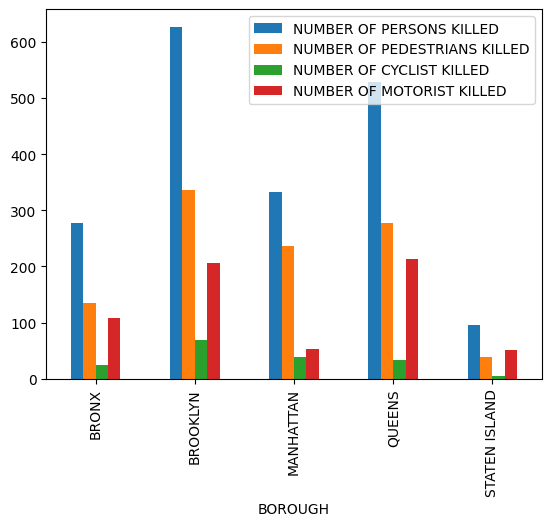

In [30]:
y.plot.bar()

In [31]:
x=df.groupby(['BOROUGH'])[['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PERSONS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']].sum()

<Axes: xlabel='BOROUGH'>

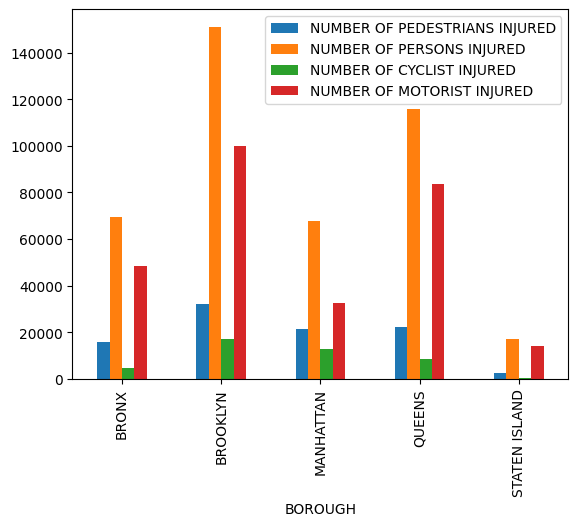

In [32]:
x.plot.bar()

Conclusion: from the above bar graph we can conclude that BROOKYN district has the high chances of crashing.

In [33]:
import pandas as pd

# Assuming df is your DataFrame
grouped_data = df.groupby(['BOROUGH', 'ON STREET NAME'])['NUMBER OF PERSONS KILLED'].sum().reset_index()
grouped_data

,BOROUGH,ON STREET NAME,NUMBER OF PERSONS KILLED
0,BRONX,,0.0
1,BRONX,149TH STREET,0.0
2,BRONX,163 street,0.0
3,BRONX,165 street,0.0
4,BRONX,169 street,0.0
...,...,...,...
15814,STATEN ISLAND,st george road,0.0
15815,STATEN ISLAND,st marys avenue,0.0
15816,STATEN ISLAND,st pauls ave,0.0
15817,STATEN ISLAND,veterans road west,0.0


In [34]:
pivot_table = grouped_data.pivot(index='BOROUGH', columns='ON STREET NAME', values='NUMBER OF PERSONS KILLED')
pivot_table

ON STREET NAME,,1st avenue,Wallabout Street,williams avenue,1 AVE,1 AVENUE,1 AVENUE,1 Avenue,1 COURT,1 PLACE,...,west street,westchester ave,westchester avenue,williamsburg bridge,willis ave bridge,wilson avenue,woodhaven blvd,woodhaven boulevard,woodside ave,wyckoff ave
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
BROOKLYN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
MANHATTAN,0.0,0.0,NaN,NaN,0.0,4.0,7.0,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
QUEENS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
STATEN ISLAND,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Removing null values

In [35]:
import pandas as pd

# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'CROSS STREET NAME'

# Drop rows with NaN values in the specified column
df_cleaned = df.dropna(subset=[column_to_clean])

# Now df_cleaned contains rows without NaN values in the specified column
df_cleaned.isnull().sum()

CRASH TIME                            0
BOROUGH                          175986
ZIP CODE                         176144
ON STREET NAME                      346
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             5
NUMBER OF PERSONS KILLED             11
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      4418
CONTRIBUTING FACTOR VEHICLE 2    185027
COLLISION_ID                          0
VEHICLE TYPE CODE 1                8175
VEHICLE TYPE CODE 2              209580
Year                                  0
Month                                 0
Day                                   0
dtype: int64

In [36]:
import pandas as pd

# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'CONTRIBUTING FACTOR VEHICLE 2'

# Drop rows with NaN values in the specified column
df_cleaned1 = df_cleaned.dropna(subset=[column_to_clean])

# Now df_cleaned contains rows without NaN values in the specified column
df_cleaned1.isnull().sum()

CRASH TIME                            0
BOROUGH                          153003
ZIP CODE                         153145
ON STREET NAME                      289
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              1
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1635
VEHICLE TYPE CODE 2               45361
Year                                  0
Month                                 0
Day                                   0
dtype: int64

In [37]:
# Assuming df is your DataFrame and '73 STREET' is the name of the column
column_to_clean = 'ZIP CODE'

# Drop rows with NaN values in the specified column
df_cleaned2 = df_cleaned1.dropna(subset=[column_to_clean])
df_cleaned2.isnull().sum()

CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
ON STREET NAME                       0
CROSS STREET NAME                    0
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2        0
COLLISION_ID                         0
VEHICLE TYPE CODE 1               1404
VEHICLE TYPE CODE 2              38974
Year                                 0
Month                                0
Day                                  0
dtype: int64

In [38]:
column_to_clean = 'VEHICLE TYPE CODE 2'

# Drop rows with NaN values in the specified column
df_cleaned3 = df_cleaned2.dropna(subset=[column_to_clean])
df_cleaned3.isnull().sum()

CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        1
NUMBER OF PERSONS KILLED         1
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              2
VEHICLE TYPE CODE 2              0
Year                             0
Month                            0
Day                              0
dtype: int64

In [39]:
# Define a mapping dictionary to group contributing factors into broader categories
factor_mapping = {
    'Failure to Yield Right-of-Way': 'Traffic Violation',
    'Traffic Control Disregarded': 'Traffic Violation',
    'Unsafe Lane Changing': 'Traffic Violation',
    'Unsafe Speed': 'Traffic Violation',
    'Driver Inattention/Distraction': 'Driver Distraction',
    'Following Too Closely': 'Driver Distraction',
    'Passing or Lane Usage Improper': 'Driver Error',
    'Turning Improperly': 'Driver Error',
    'Passing Too Closely': 'Driver Error',
    'Driver Inexperience': 'Driver Error',
    'Reaction to Uninvolved Vehicle': 'Driver Error',
    'Pavement Slippery': 'Road Condition',
    'Obstruction/Debris': 'Road Condition',
    'Glare': 'Road Condition',
    'View Obstructed/Limited': 'Road Condition',
    'Other Vehicular': 'Other',
    'Unspecified': 'Other',
    'Alcohol Involvement': 'Impairment',
    'Drugs (illegal)': 'Impairment',
    'Drugs (Illegal)': 'Impairment',  # Handling case variations
    'Fatigued/Drowsy': 'Physical Condition',
    'Illnes': 'Physical Condition',  # Correcting misspelling
    'Lost Consciousness': 'Physical Condition',
    'Fell Asleep': 'Physical Condition',
    'Illness': 'Physical Condition',  # Handling case variations
    'Other Lighting Defects': 'Vehicle Defect',
    'Brakes Defective': 'Vehicle Defect',
    'Tire Failure/Inadequate': 'Vehicle Defect',
    'Accelerator Defective': 'Vehicle Defect',
    'Steering Failure': 'Vehicle Defect',
    'Headlights Defective': 'Vehicle Defect',
    'Shoulders Defective/Improper': 'Vehicle Defect',
    'Windshield Inadequate': 'Vehicle Defect',
    'Other Electronic Device': 'Distraction',
    'Eating or Drinking': 'Distraction',
    'Cell Phone (hands-free)': 'Distraction',
    'Cell Phone (hand-Held)': 'Distraction',
    'Texting': 'Distraction',
    'Listening/Using Headphones': 'Distraction',
    'Using On Board Navigation Device': 'Distraction',
    'Outside Car Distraction': 'Distraction',
    'Passenger Distraction': 'Distraction',
    'Reaction to Other Uninvolved Vehicle': 'Other',
    'Animals Action': 'Other',
    'Vehicle Vandalism': 'Other',
    'Driverless/Runaway Vehicle': 'Other',
    'Tow Hitch Defective': 'Other',
    'Prescription Medication': 'Other',
    '80': 'Other',  # Unclear category, assigned to 'Other'
    '1': 'Other',   # Unclear category, assigned to 'Other'
    'Pavement Defective': 'Other',  # Unclear category, assigned to 'Other'
    'Lane Marking Improper/Inadequate': 'Other',
    'Traffic Control Device Improper/Non-Working': 'Other',
    'Windshield Inadequate': 'Vehicle Defect',  # Handling duplication
    'Tire Failure/Inadequate': 'Vehicle Defect',  # Handling duplication
    '80': 'Other',  # Handling duplication
    'Drugs (Illegal)': 'Impairment'  # Handling duplication
}

# Apply the mapping to create a new column with merged contributing factors
df_cleaned3['Merged_Contributing_Factor'] = df_cleaned3['CONTRIBUTING FACTOR VEHICLE 1'].map(factor_mapping)

# Display unique merged categories
merged_categories = df_cleaned3['Merged_Contributing_Factor'].unique()
print("Unique Merged Contributing Factors:")
print(merged_categories)


Unique Merged Contributing Factors:
['Driver Error' 'Other' 'Impairment' 'Road Condition' 'Traffic Violation'
 'Driver Distraction' 'Physical Condition' 'Vehicle Defect' nan
 'Distraction']


In [40]:
df_cleaned3

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month,Day,Merged_Contributing_Factor
9,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,0,...,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
11,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,0,...,0,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle,2021,12,14,Driver Error
14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,0,...,0,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan,2021,12,14,Driver Error
18,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,Sedan,2021,12,11,Other
24,17:40,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4487001,Sedan,Sedan,2021,12,13,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081059,13:39,BROOKLYN,11208.0,JAMAICA AVENUE,CYPRESS HILL STREET,1.0,0.0,0,0,0,...,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,4717316,Station Wagon/Sport Utility Vehicle,E-Scooter,2024,4,14,Traffic Violation
2081060,12:20,STATEN ISLAND,10314.0,SLOSSON AVENUE,POTTER AVENUE,0.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4717674,Station Wagon/Sport Utility Vehicle,Sedan,2024,4,13,Other
2081070,11:58,MANHATTAN,10001.0,WEST 34 STREET,DYER AVENUE,0.0,0.0,0,0,0,...,0,Oversized Vehicle,Passing Too Closely,4717643,Bus,Sedan,2024,4,12,NaN
2081076,15:30,MANHATTAN,10036.0,WEST 42 STREET,8 AVENUE,0.0,0.0,0,0,0,...,0,Unspecified,Unspecified,4717332,Sedan,Bus,2024,4,14,Other


In [41]:
# Drop rows with missing values in the 'Merged_Contributing_Factor' column
df_cleaned3 = df_cleaned3.dropna(subset=['Merged_Contributing_Factor'])

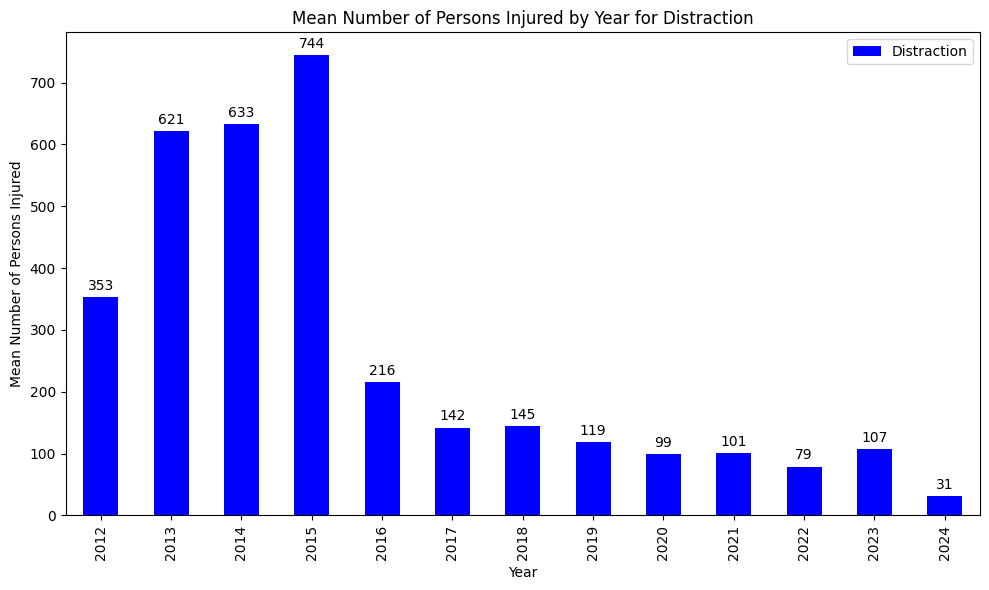

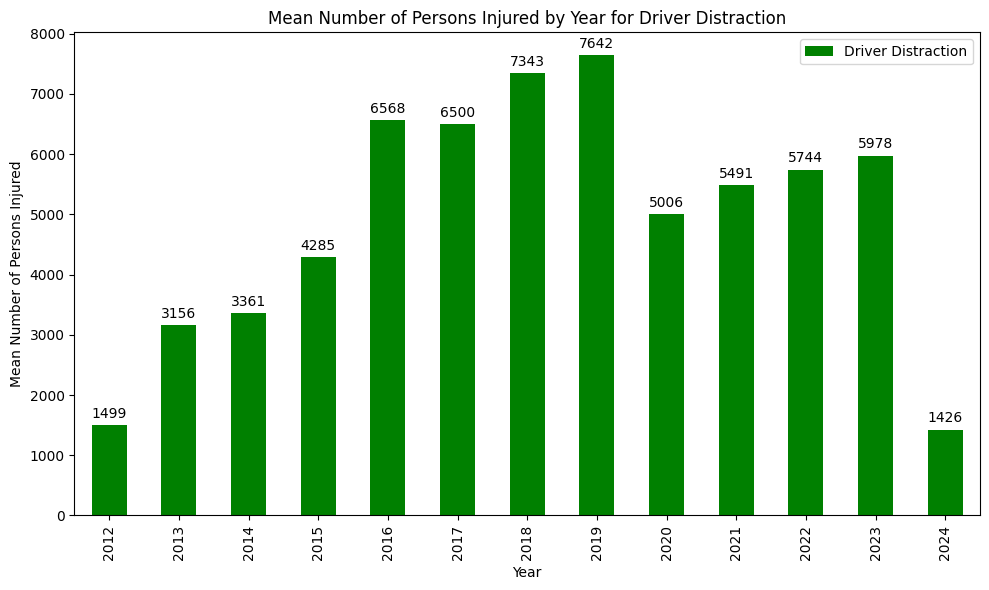

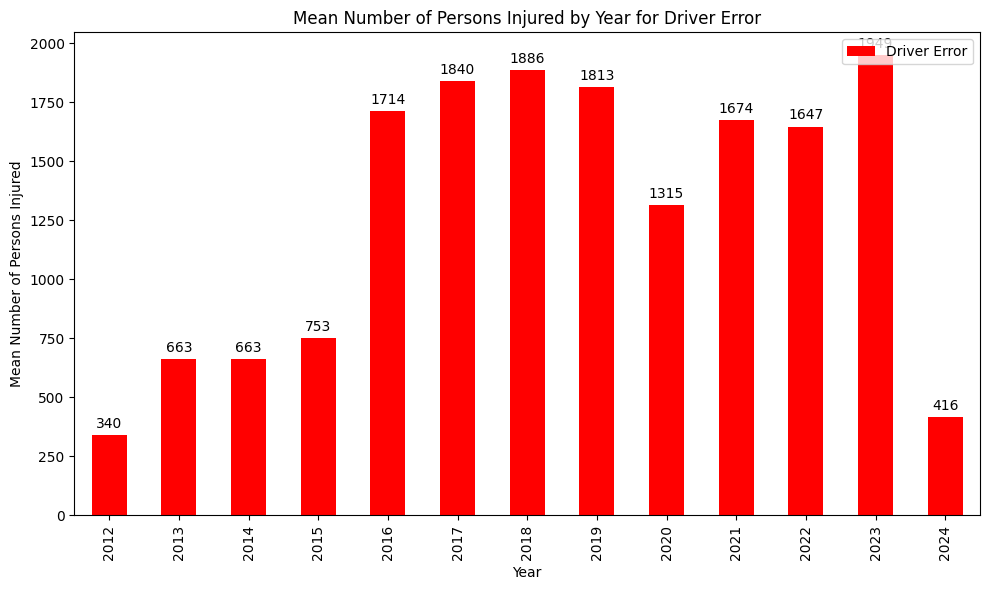

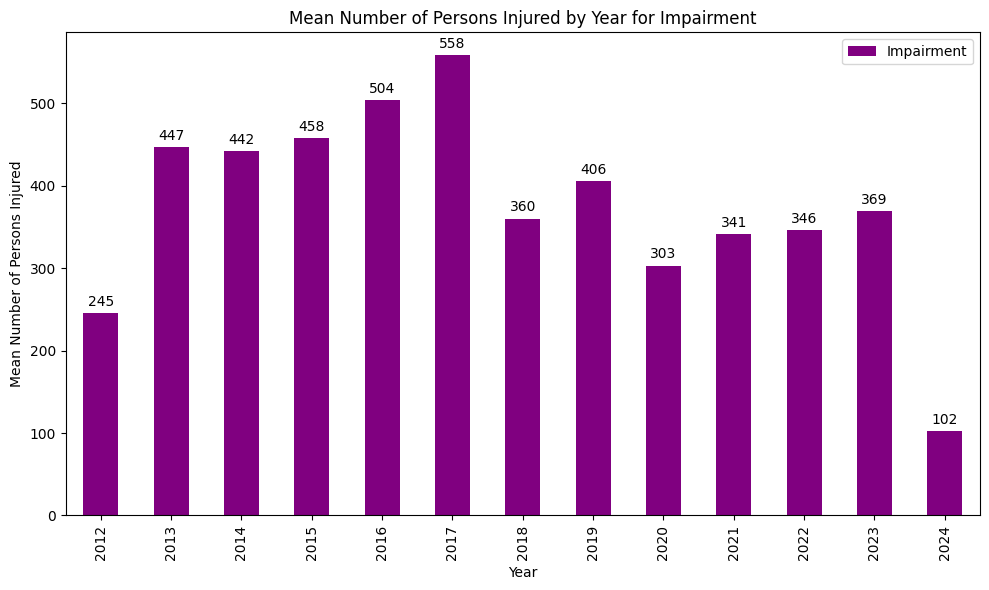

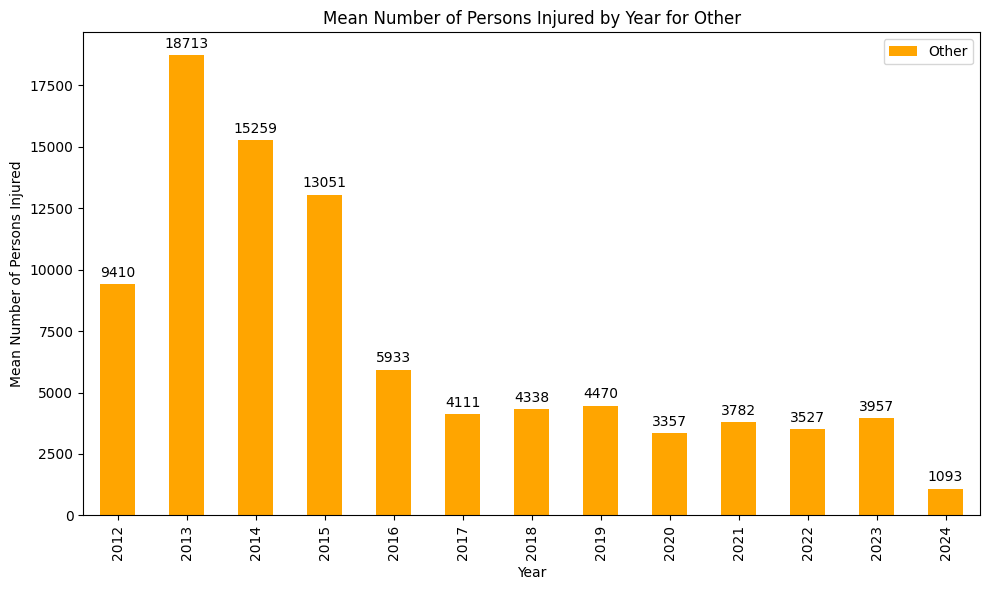

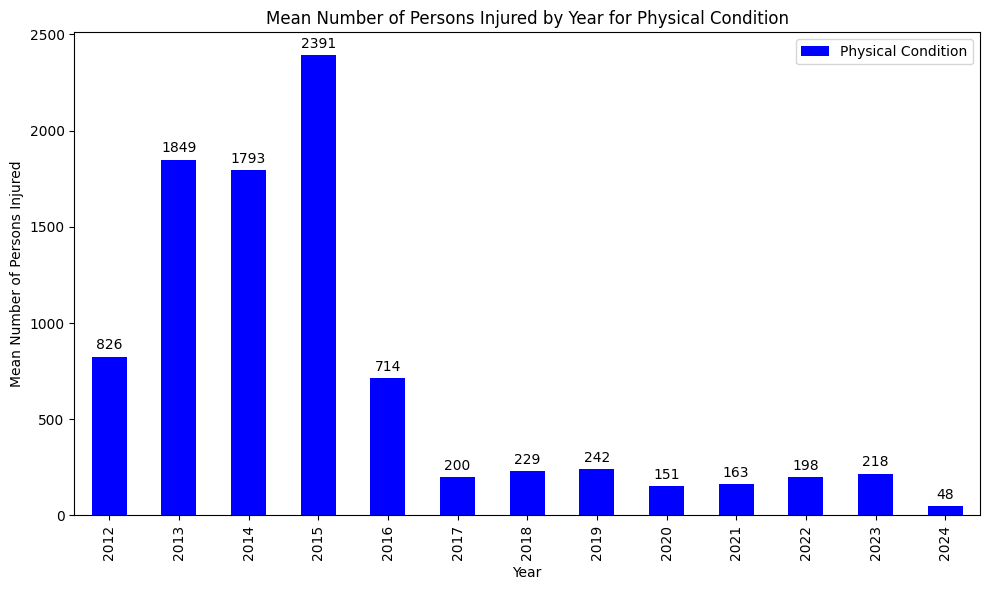

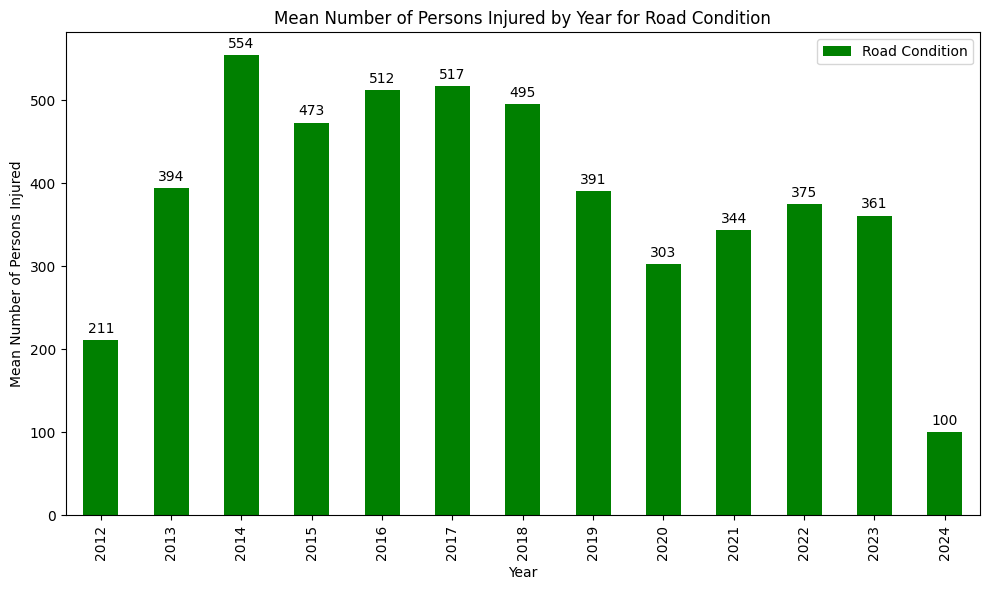

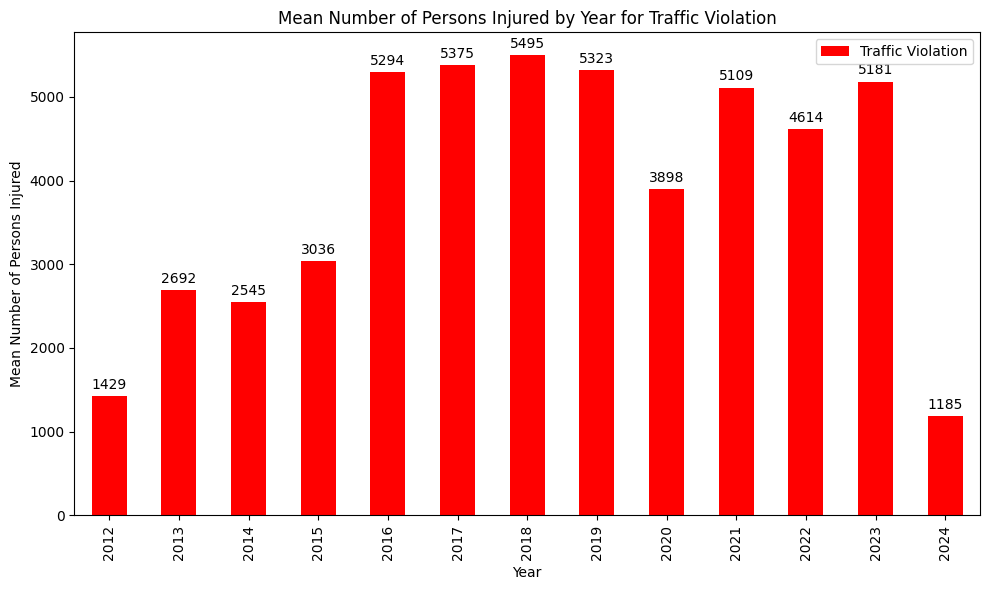

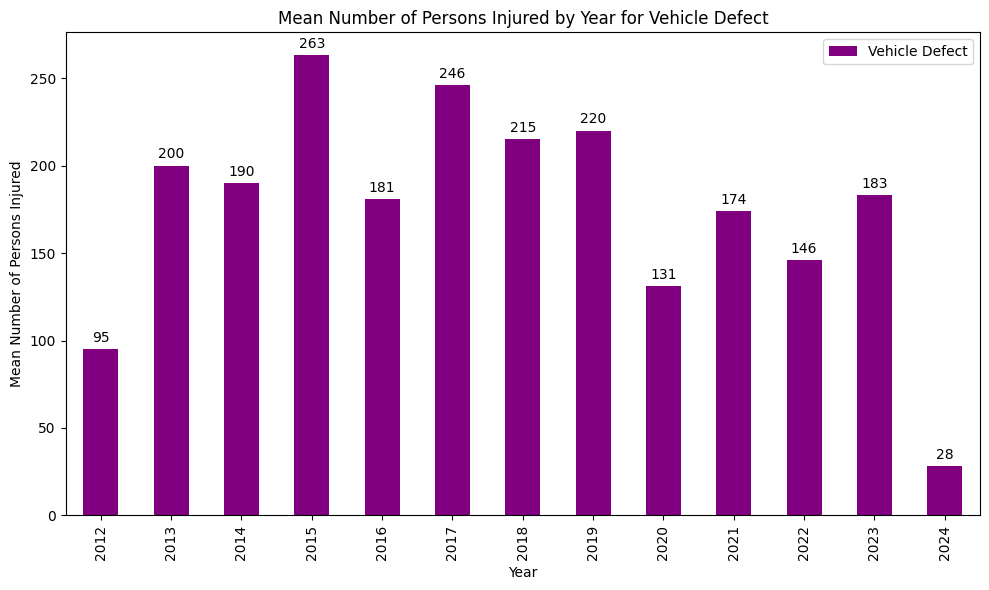

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned3 is your original DataFrame
# Group the DataFrame by 'Merged_Contributing_Factor'
grouped = df_cleaned3.groupby('Merged_Contributing_Factor')

# Define colors for each category (adjust as needed)
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate over each group
for i, (category, category_df) in enumerate(grouped):
    plt.figure(figsize=(10, 6))
    
    # Plotting 'NUMBER OF PERSONS INJURED' by 'Year'
    ax = category_df.groupby('Year')['NUMBER OF PERSONS INJURED'].sum().plot(kind='bar', color=colors[i % len(colors)])
    
    # Add annotations for each bar (showing the count on top)
    for bar in ax.patches:
        # Get the height of the bar
        height = bar.get_height()
        # Add the count (height) on top of the bar with formatting
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')
    
    # Set plot title, labels, and legend
    plt.title(f'Mean Number of Persons Injured by Year for {category}')
    plt.xlabel('Year')
    plt.ylabel('Mean Number of Persons Injured')
    plt.legend([category], loc='upper right')
    
    # Show plot
    plt.tight_layout()
    plt.show()



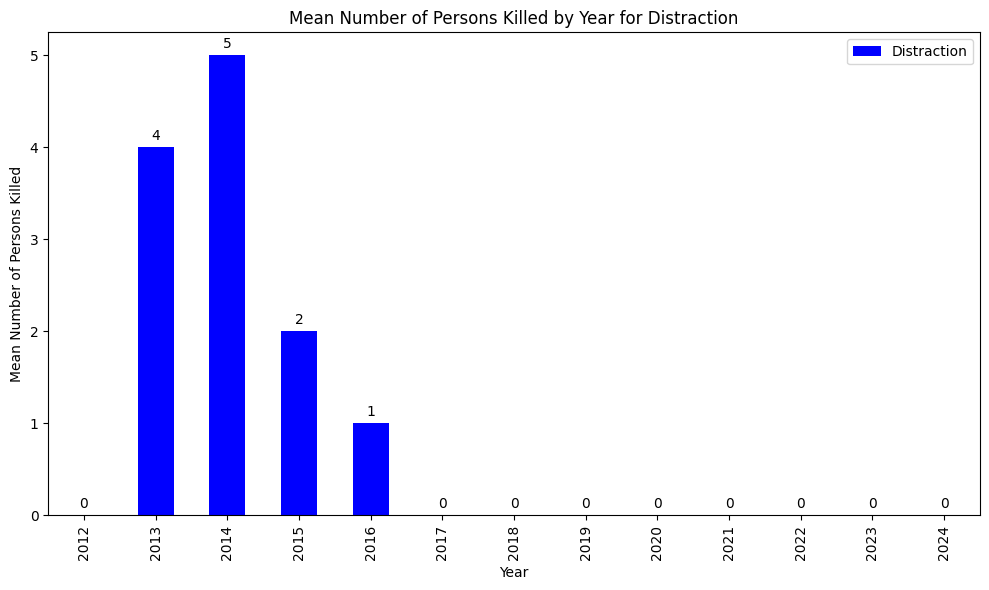

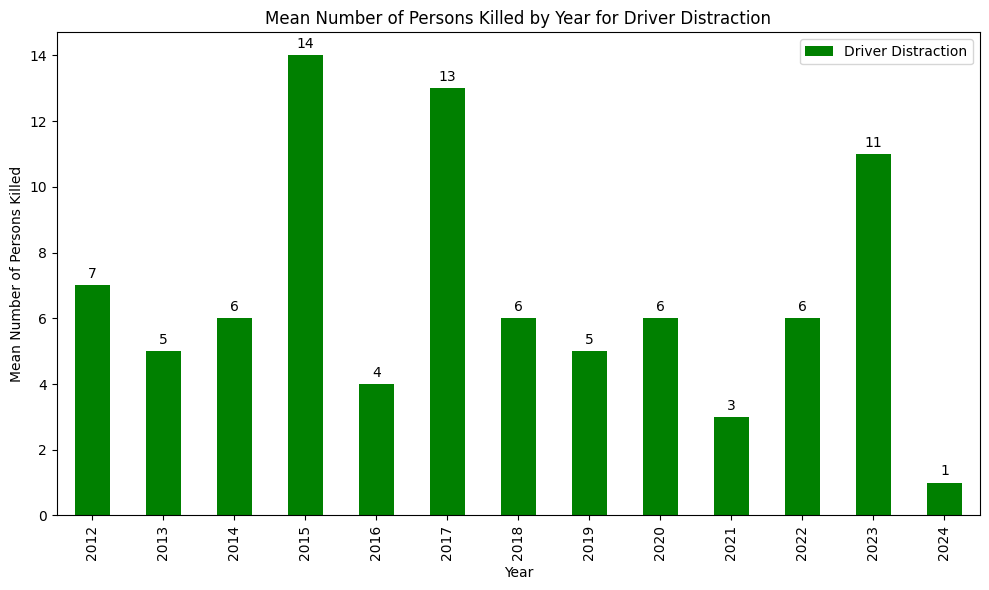

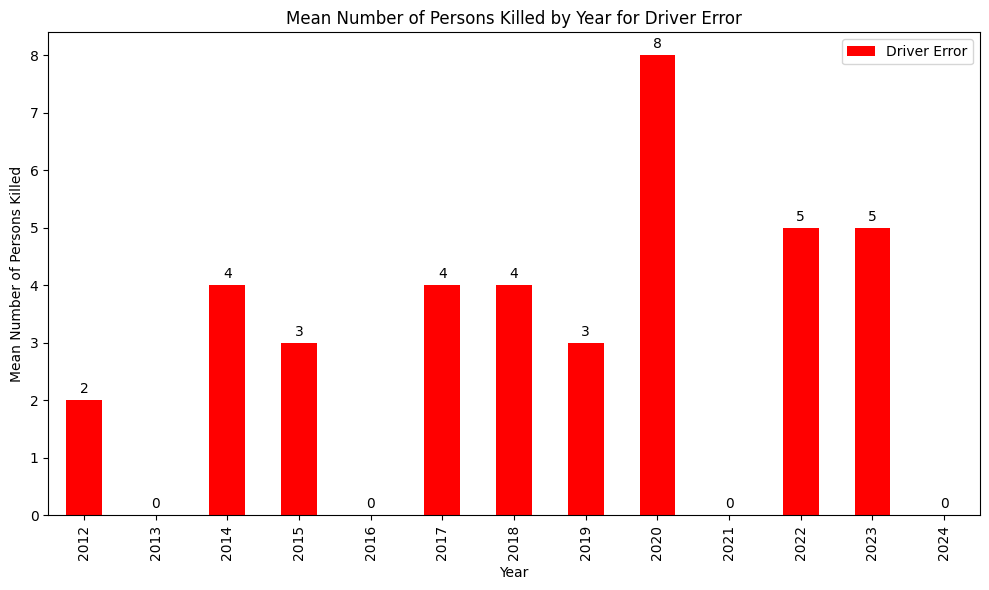

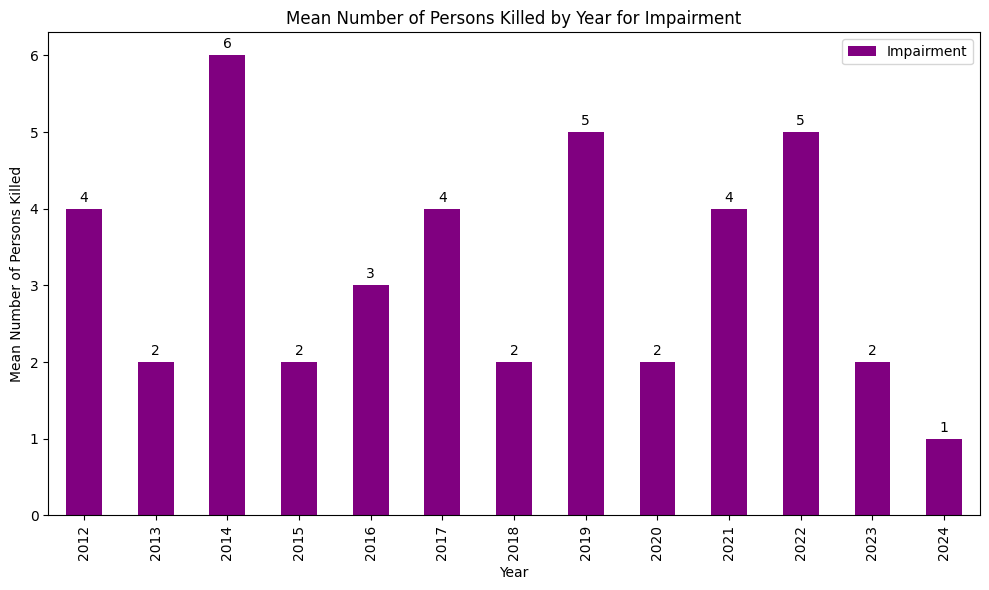

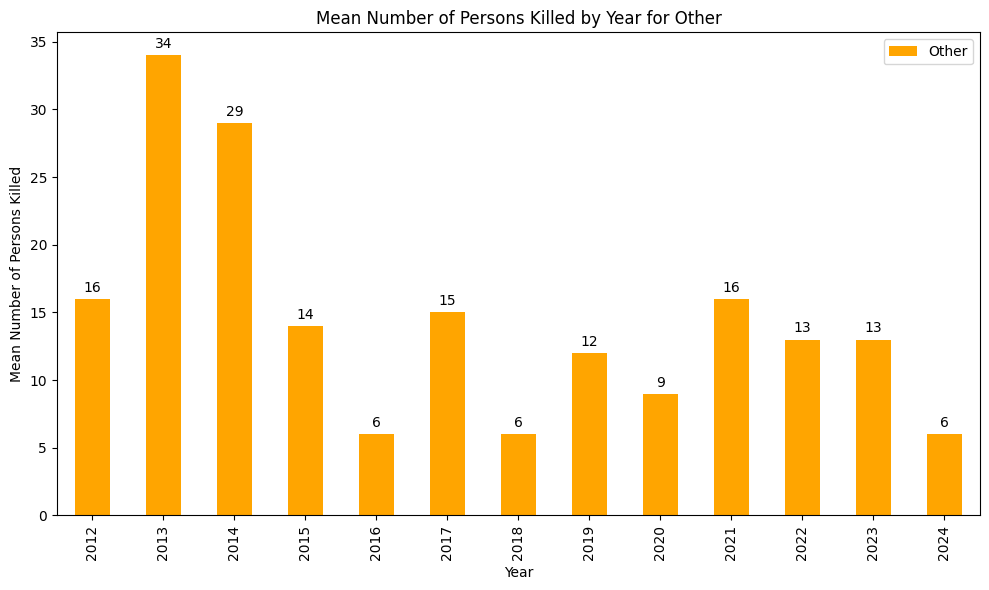

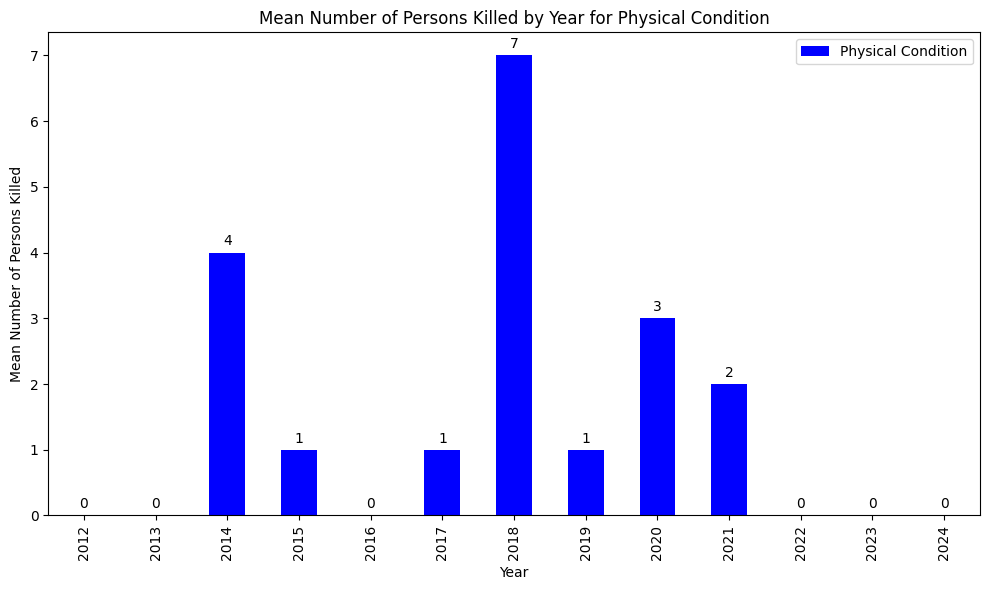

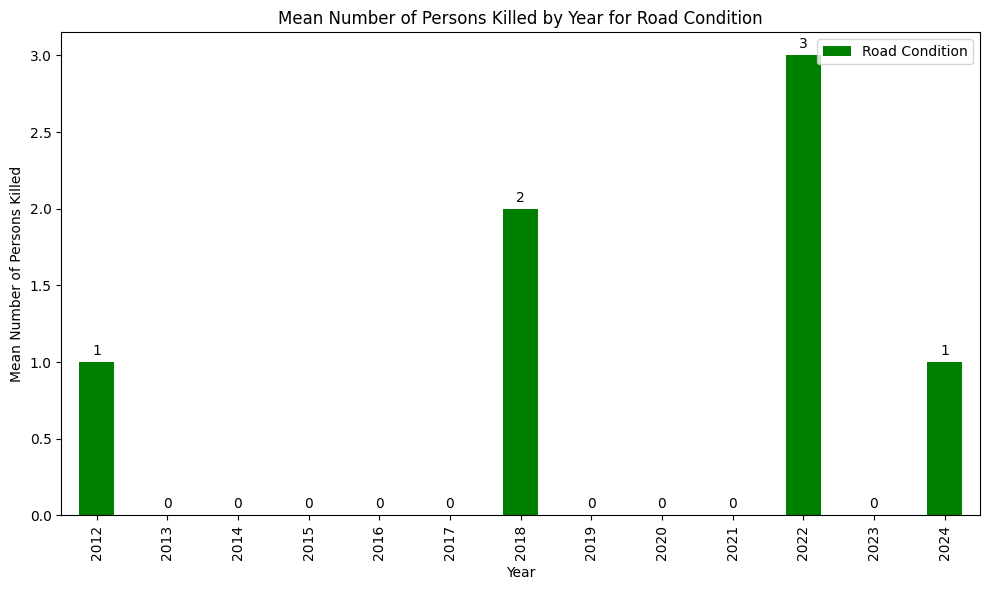

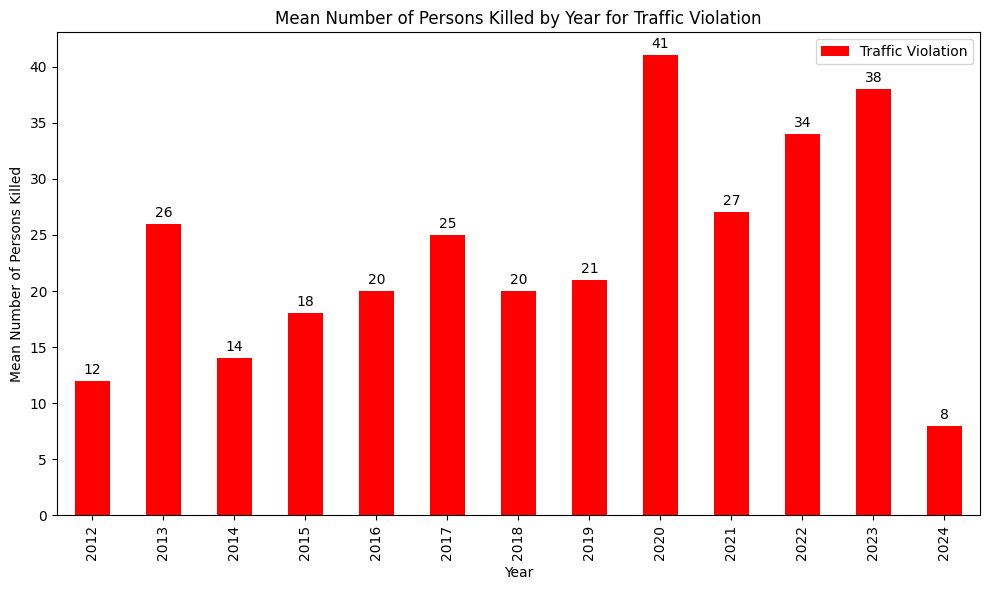

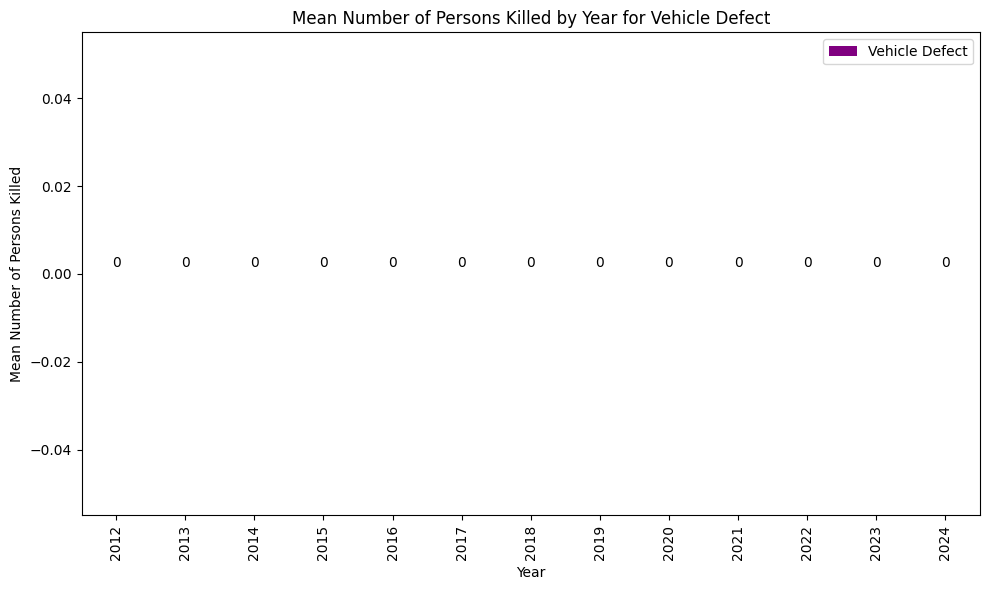

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned3 is your original DataFrame
# Group the DataFrame by 'Merged_Contributing_Factor'
grouped = df_cleaned3.groupby('Merged_Contributing_Factor')

# Define colors for each category (adjust as needed)
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate over each group
for i, (category, category_df) in enumerate(grouped):
    plt.figure(figsize=(10, 6))
    
    # Plotting 'NUMBER OF PERSONS INJURED' by 'Year'
    ax = category_df.groupby('Year')['NUMBER OF PERSONS KILLED'].sum().plot(kind='bar', color=colors[i % len(colors)])
    
    # Add annotations for each bar (showing the count on top)
    for bar in ax.patches:
        # Get the height of the bar
        height = bar.get_height()
        # Add the count (height) on top of the bar with formatting
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')
    
    # Set plot title, labels, and legend
    plt.title(f'Mean Number of Persons Killed by Year for {category}')
    plt.xlabel('Year')
    plt.ylabel('Mean Number of Persons Killed')
    plt.legend([category], loc='upper right')
    
    # Show plot
    plt.tight_layout()
    plt.show()

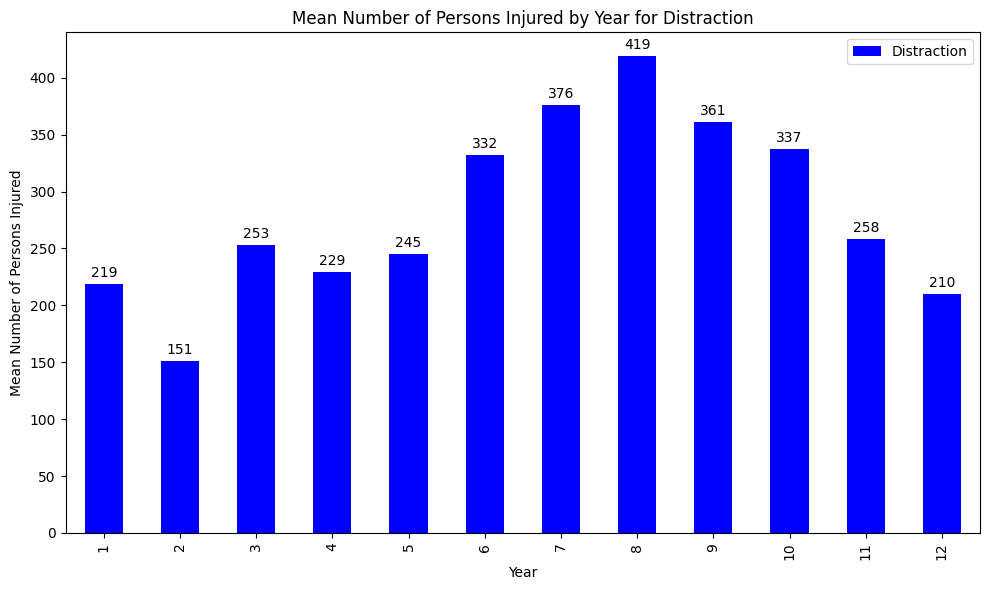

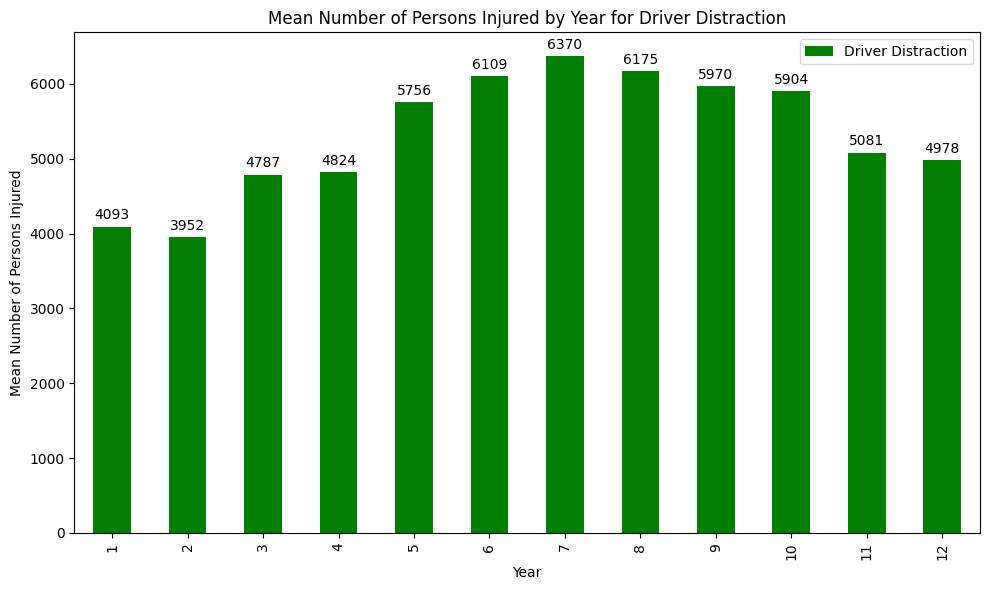

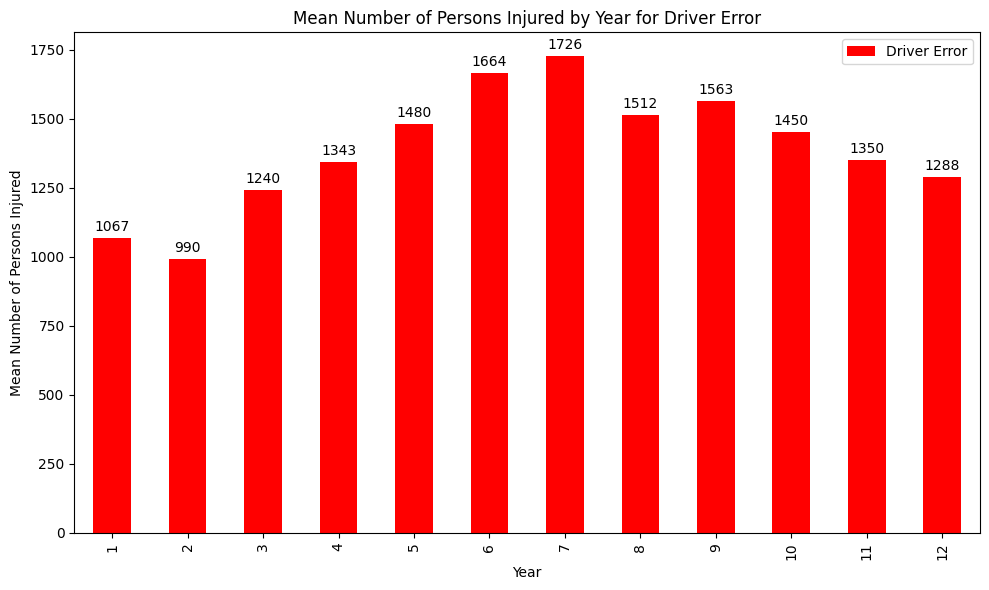

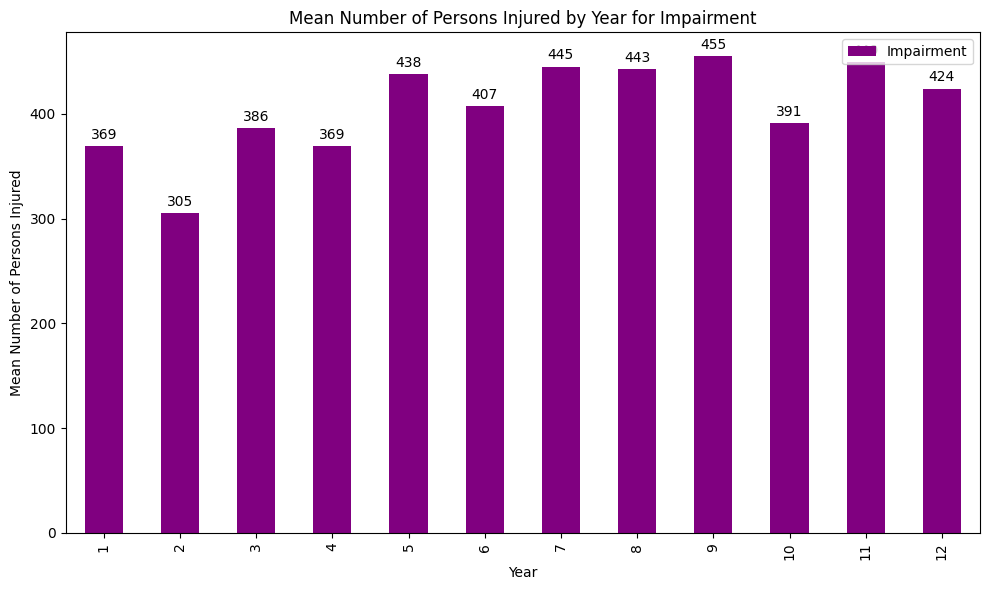

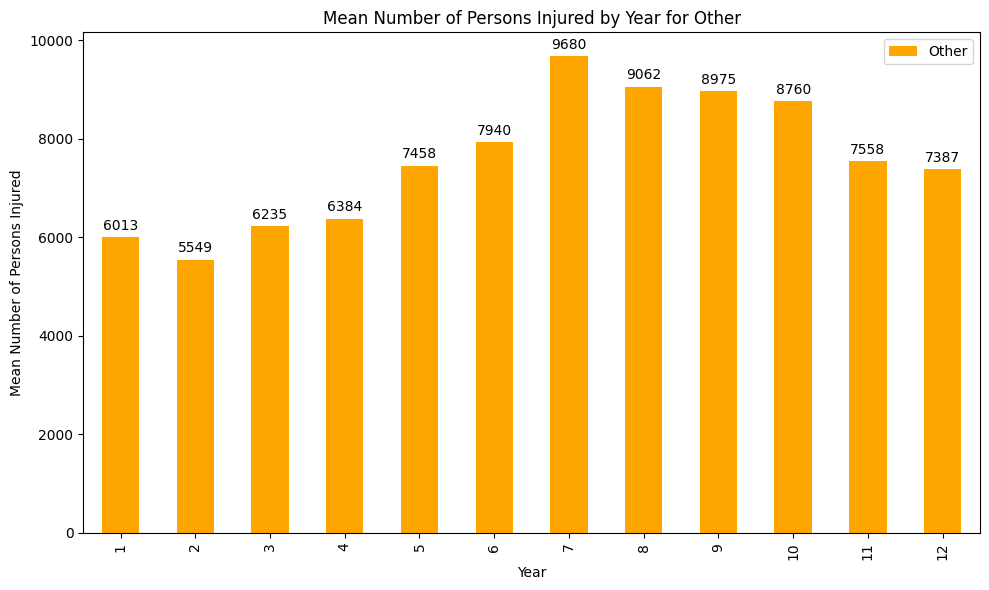

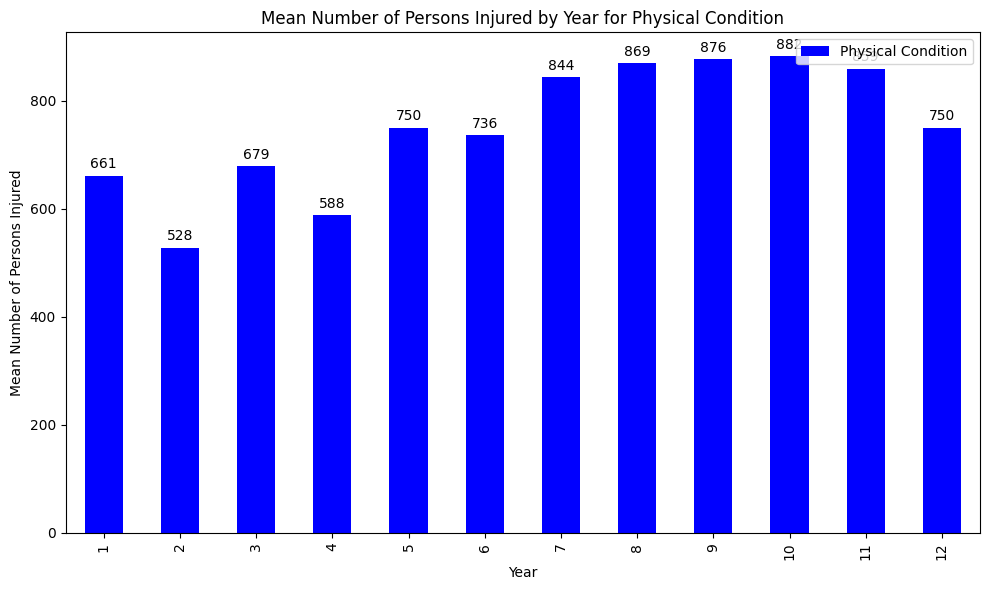

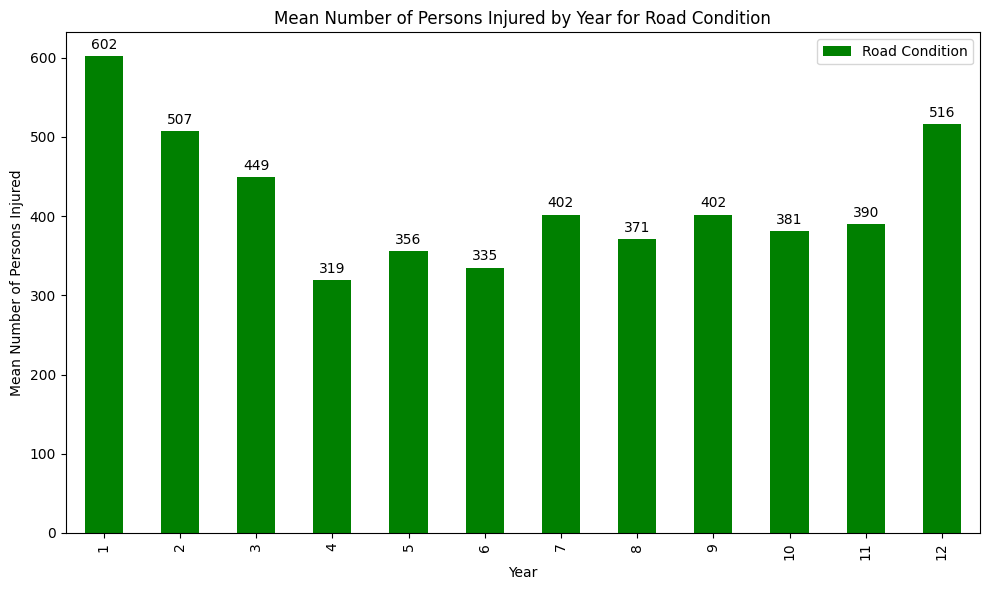

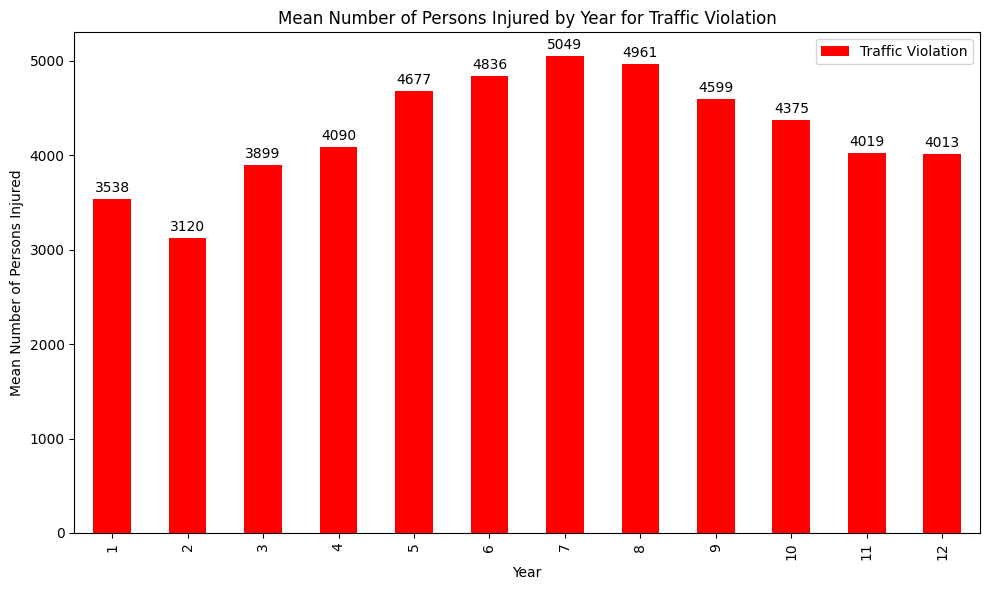

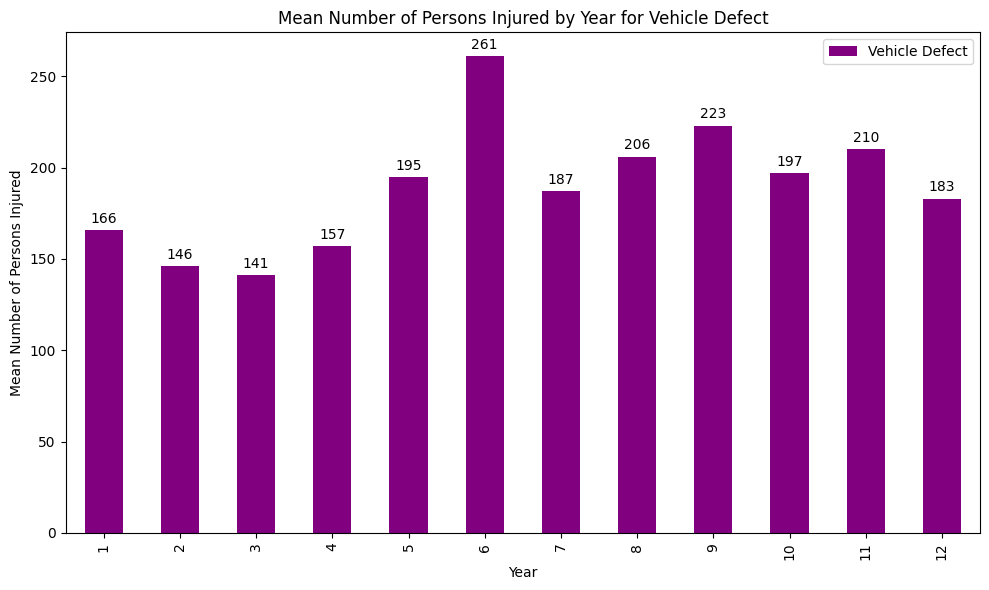

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned3 is your original DataFrame
# Group the DataFrame by 'Merged_Contributing_Factor'
grouped = df_cleaned3.groupby('Merged_Contributing_Factor')

# Define colors for each category (adjust as needed)
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate over each group
for i, (category, category_df) in enumerate(grouped):
    plt.figure(figsize=(10, 6))
    
    # Plotting 'NUMBER OF PERSONS INJURED' by 'Year'
    ax = category_df.groupby('Month')['NUMBER OF PERSONS INJURED'].sum().plot(kind='bar', color=colors[i % len(colors)])
    
    # Add annotations for each bar (showing the count on top)
    for bar in ax.patches:
        # Get the height of the bar
        height = bar.get_height()
        # Add the count (height) on top of the bar with formatting
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')
    
    # Set plot title, labels, and legend
    plt.title(f'Mean Number of Persons Injured by Year for {category}')
    plt.xlabel('Year')
    plt.ylabel('Mean Number of Persons Injured')
    plt.legend([category], loc='upper right')
    
    # Show plot
    plt.tight_layout()
    plt.show()

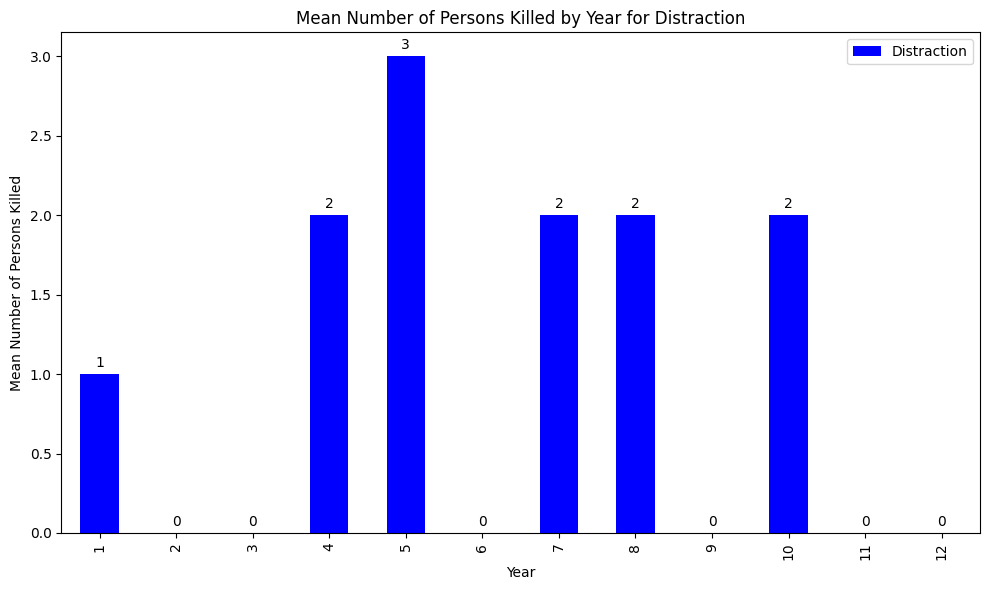

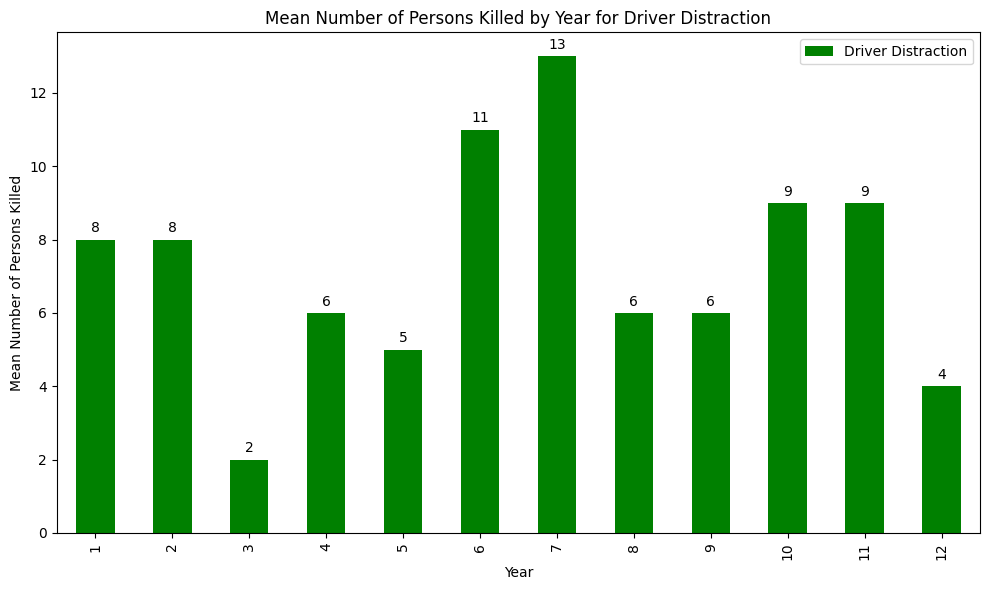

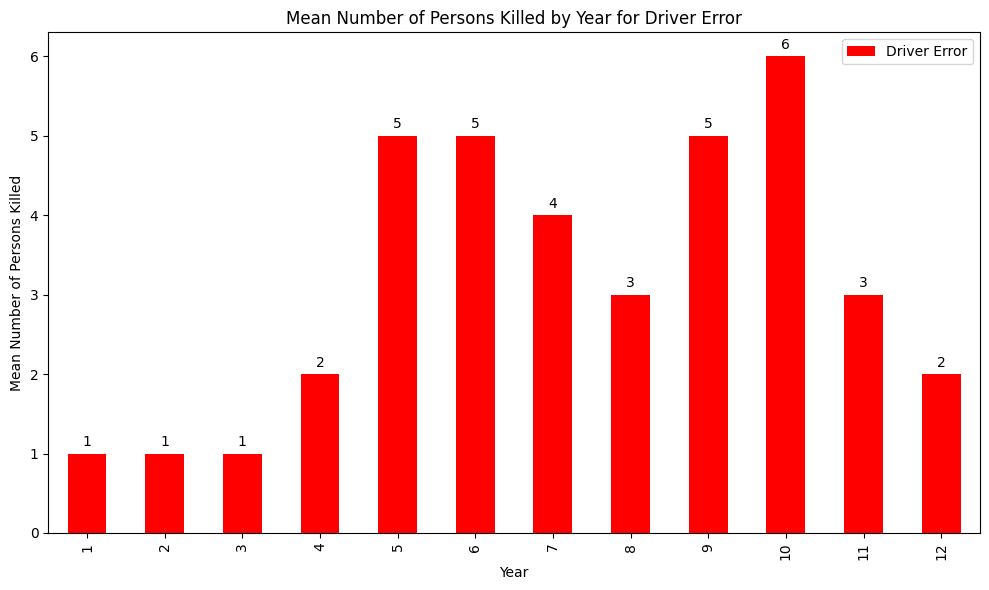

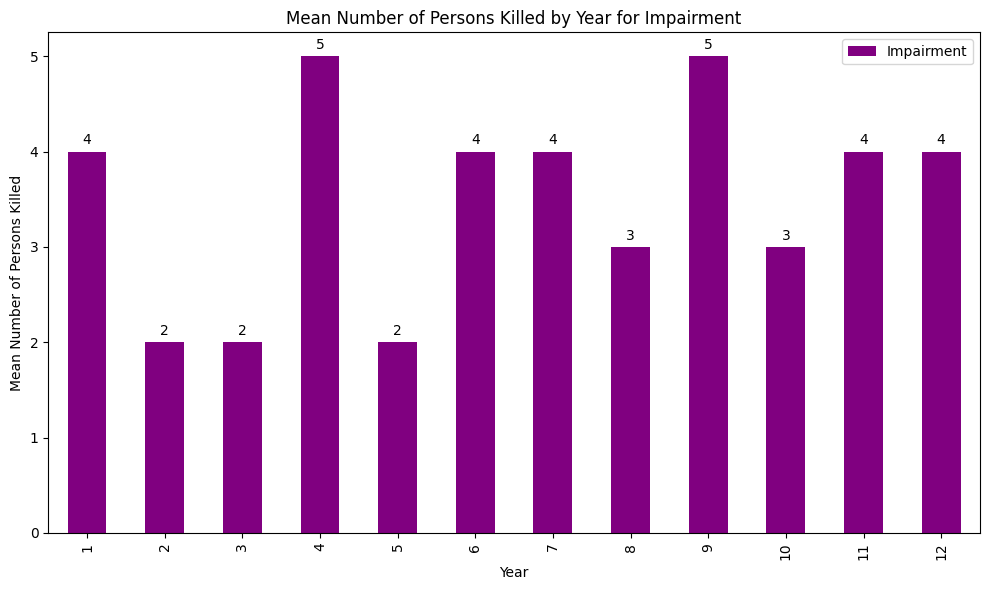

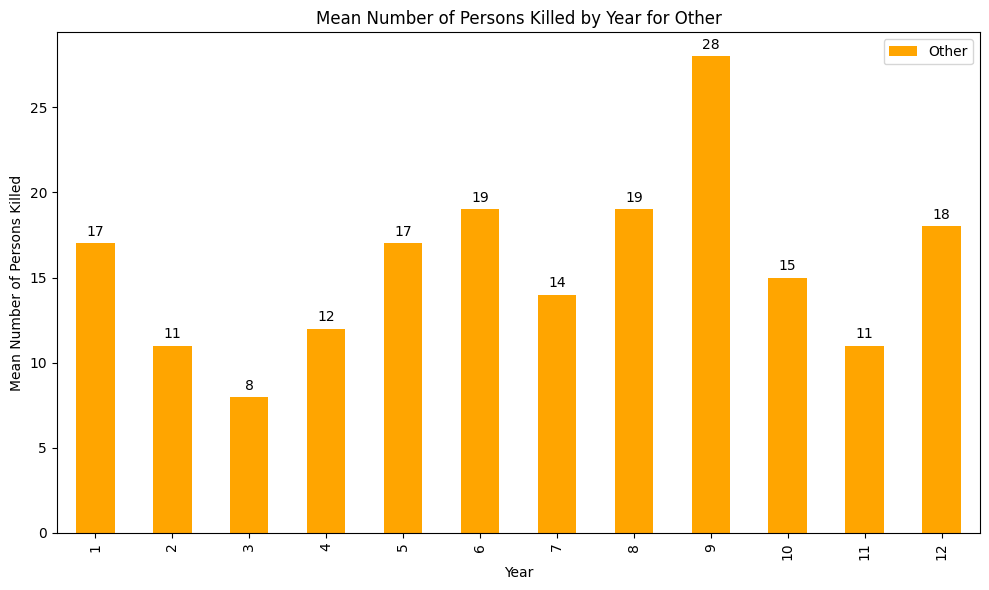

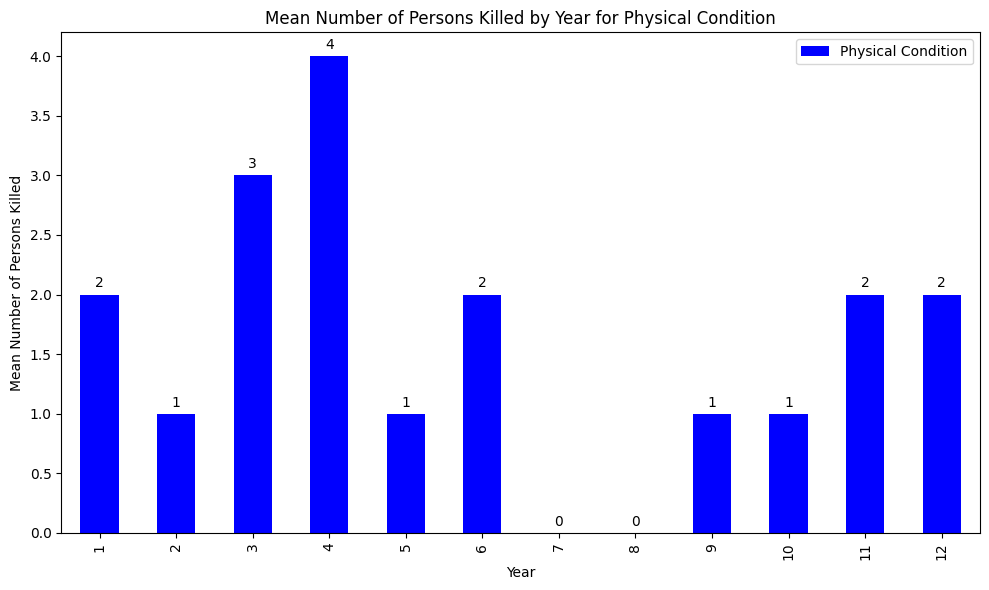

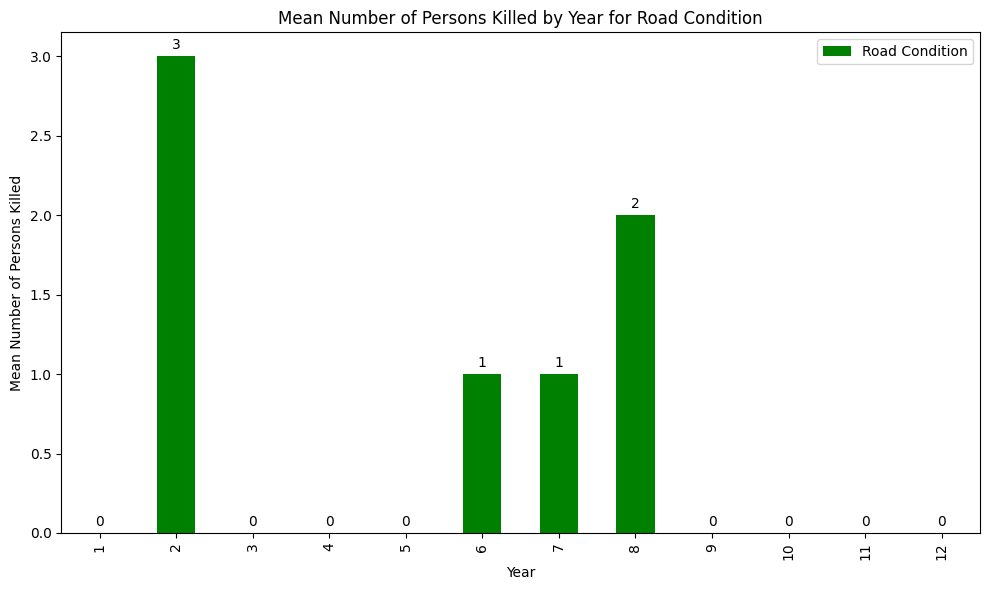

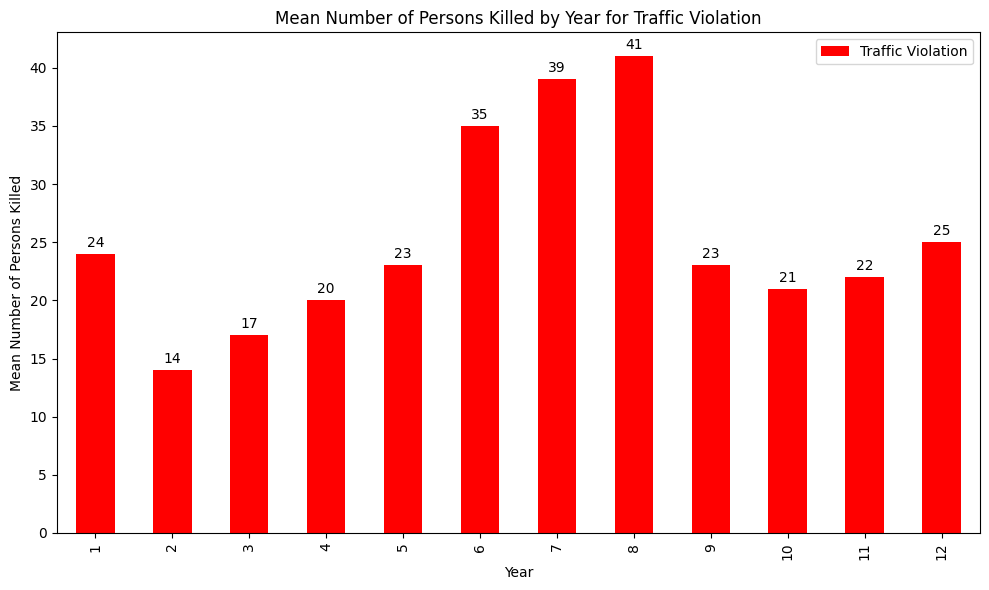

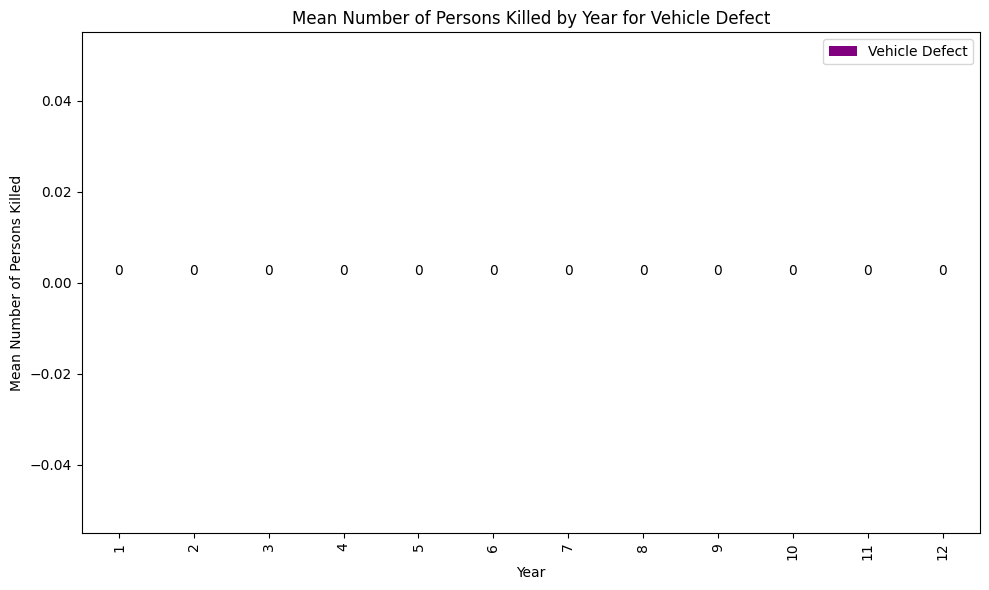

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned3 is your original DataFrame
# Group the DataFrame by 'Merged_Contributing_Factor'
grouped = df_cleaned3.groupby('Merged_Contributing_Factor')

# Define colors for each category (adjust as needed)
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate over each group
for i, (category, category_df) in enumerate(grouped):
    plt.figure(figsize=(10, 6))
    
    # Plotting 'NUMBER OF PERSONS INJURED' by 'Year'
    ax = category_df.groupby('Month')['NUMBER OF PERSONS KILLED'].sum().plot(kind='bar', color=colors[i % len(colors)])
    
    # Add annotations for each bar (showing the count on top)
    for bar in ax.patches:
        # Get the height of the bar
        height = bar.get_height()
        # Add the count (height) on top of the bar with formatting
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')
    
    # Set plot title, labels, and legend
    plt.title(f'Mean Number of Persons Killed by Year for {category}')
    plt.xlabel('Year')
    plt.ylabel('Mean Number of Persons Killed')
    plt.legend([category], loc='upper right')
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [46]:
df_cleaned3.isnull().sum()

CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        1
NUMBER OF PERSONS KILLED         1
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              2
VEHICLE TYPE CODE 2              0
Year                             0
Month                            0
Day                              0
Merged_Contributing_Factor       0
dtype: int64

In [47]:
df_cleaned3.fillna('0',inplace=True)

In [48]:
df_cleaned3.isnull().sum()

CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
Year                             0
Month                            0
Day                              0
Merged_Contributing_Factor       0
dtype: int64

In [49]:
#Finding Numerical Columns
numeric_cols=[]
for col in df_cleaned3.columns:
    if(df_cleaned3[col].dtypes!='object'):
        numeric_cols.append(col)
print(f"There are total {len(numeric_cols)} numerical columns in dataset")
print(numeric_cols)

There are total 10 numerical columns in dataset
['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'Year', 'Month', 'Day']


In [50]:
cat_col=[]
for col in df_cleaned3.columns:
    if(df_cleaned3[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} numerical columns in dataset")
print(cat_col)

There are total 12 numerical columns in dataset
['CRASH TIME', 'BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'Merged_Contributing_Factor']


# using scaling to normalise the features

In [51]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df_cleaned3.select_dtypes(include=['number'])
numeric_cols.drop(['Year','Month','Day'],axis=1,inplace=True)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_cols)
num = pd.DataFrame(scaled_data,columns = numeric_cols.columns)

num

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.950958
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.951087
2,0.0,0.0,0.0,0.0,0.046512,0.0,0.950982
3,0.0,0.0,0.0,0.0,0.023256,0.0,0.951068
4,0.0,0.0,0.0,0.0,0.023256,0.0,0.951060
...,...,...,...,...,...,...,...
864909,0.0,0.0,0.0,0.0,0.000000,0.0,0.999929
864910,0.0,0.0,0.0,0.0,0.000000,0.0,0.999877
864911,0.0,0.0,0.0,0.0,0.000000,0.0,0.999953
864912,0.0,0.0,0.0,0.0,0.000000,0.0,0.999881


In [52]:
df_cleaned3['Year']=df_cleaned3['Year'].astype(str)


In [53]:
cat_col=[]
for col in df_cleaned3.columns:
    if(df_cleaned3[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} numerical columns in dataset")
print(cat_col)


There are total 13 numerical columns in dataset
['CRASH TIME', 'BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'Year', 'Merged_Contributing_Factor']


In [54]:
cat = df_cleaned3.select_dtypes(include='O')
cat.dtypes

CRASH TIME                       object
BOROUGH                          object
ZIP CODE                         object
ON STREET NAME                   object
CROSS STREET NAME                object
NUMBER OF PERSONS INJURED        object
NUMBER OF PERSONS KILLED         object
CONTRIBUTING FACTOR VEHICLE 1    object
CONTRIBUTING FACTOR VEHICLE 2    object
VEHICLE TYPE CODE 1              object
VEHICLE TYPE CODE 2              object
Year                             object
Merged_Contributing_Factor       object
dtype: object

# encoding the data to convert the categorical columns into numerical columns

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat1= cat.astype(str)
Categorcial_Final=cat1.apply(le.fit_transform).reset_index()
Categorcial_Final

,index,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Merged_Contributing_Factor
0,9,358,2,32,986,5680,1,1,31,54,443,638,9,2
1,11,470,3,336,9780,5865,1,1,45,54,443,638,9,2
2,14,910,3,372,8127,483,13,1,37,54,443,623,9,2
3,18,643,0,155,11481,7378,2,1,48,54,455,623,9,4
4,24,520,4,107,10612,14146,2,1,48,54,443,623,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864909,2081056,315,1,250,9131,9299,1,1,8,10,443,452,12,1
864910,2081059,279,1,216,6623,4711,2,1,14,17,455,201,12,7
864911,2081060,200,4,129,9657,10580,1,1,48,54,455,623,12,4
864912,2081076,390,2,70,11310,1721,1,1,48,54,443,84,12,4


# conactinating numerical and categorical columns

In [56]:
Month=df_cleaned3['Month'].reset_index()
Day= df_cleaned3['Day'].reset_index()

In [57]:
final = pd.concat([Categorcial_Final,num,Month,Day],axis=1)

In [58]:
final['Merged_Contributing_Factor'].nunique()

9

In [59]:
final.columns

Index(['index', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'ON STREET NAME',
       'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'Year', 'Merged_Contributing_Factor',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'COLLISION_ID', 'index', 'Month', 'index', 'Day'],
      dtype='object')

In [60]:
final.drop(['index','COLLISION_ID'],axis=1)

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,...,Year,Merged_Contributing_Factor,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Month,Day
0,358,2,32,986,5680,1,1,31,54,443,...,9,2,0.0,0.0,0.0,0.0,0.000000,0.0,12,14
1,470,3,336,9780,5865,1,1,45,54,443,...,9,2,0.0,0.0,0.0,0.0,0.000000,0.0,12,14
2,910,3,372,8127,483,13,1,37,54,443,...,9,2,0.0,0.0,0.0,0.0,0.046512,0.0,12,14
3,643,0,155,11481,7378,2,1,48,54,455,...,9,4,0.0,0.0,0.0,0.0,0.023256,0.0,12,11
4,520,4,107,10612,14146,2,1,48,54,443,...,9,4,0.0,0.0,0.0,0.0,0.023256,0.0,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864909,315,1,250,9131,9299,1,1,8,10,443,...,12,1,0.0,0.0,0.0,0.0,0.000000,0.0,4,14
864910,279,1,216,6623,4711,2,1,14,17,455,...,12,7,0.0,0.0,0.0,0.0,0.000000,0.0,4,14
864911,200,4,129,9657,10580,1,1,48,54,455,...,12,4,0.0,0.0,0.0,0.0,0.000000,0.0,4,13
864912,390,2,70,11310,1721,1,1,48,54,443,...,12,4,0.0,0.0,0.0,0.0,0.000000,0.0,4,14


In [61]:
final.drop(['index','COLLISION_ID'],axis=1,inplace=True)

In [62]:
final.drop(['CONTRIBUTING FACTOR VEHICLE 1'],axis=1,inplace=True)

In [63]:
final

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Merged_Contributing_Factor,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Month,Day
0,358,2,32,986,5680,1,1,54,443,638,9,2,0.0,0.0,0.0,0.0,0.000000,0.0,12,14
1,470,3,336,9780,5865,1,1,54,443,638,9,2,0.0,0.0,0.0,0.0,0.000000,0.0,12,14
2,910,3,372,8127,483,13,1,54,443,623,9,2,0.0,0.0,0.0,0.0,0.046512,0.0,12,14
3,643,0,155,11481,7378,2,1,54,455,623,9,4,0.0,0.0,0.0,0.0,0.023256,0.0,12,11
4,520,4,107,10612,14146,2,1,54,443,623,9,4,0.0,0.0,0.0,0.0,0.023256,0.0,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864909,315,1,250,9131,9299,1,1,10,443,452,12,1,0.0,0.0,0.0,0.0,0.000000,0.0,4,14
864910,279,1,216,6623,4711,2,1,17,455,201,12,7,0.0,0.0,0.0,0.0,0.000000,0.0,4,14
864911,200,4,129,9657,10580,1,1,54,455,623,12,4,0.0,0.0,0.0,0.0,0.000000,0.0,4,13
864912,390,2,70,11310,1721,1,1,54,443,84,12,4,0.0,0.0,0.0,0.0,0.000000,0.0,4,14


In [64]:
x= final.drop(['Merged_Contributing_Factor'],axis=1)
y= final[['Merged_Contributing_Factor']]

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [66]:
x.shape

(864914, 19)

# splitting the data

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# Logistic Regression for 9 lakh rows

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred = log_reg.predict(x_test)
y_pred

array([4, 4, 4, ..., 1, 4, 4])

In [70]:
log_reg.coef_

array([[-4.31029263e-04, -6.22353207e-06, -7.35573734e-04,
         2.33479449e-05,  1.34113253e-05, -6.10321478e-06,
        -2.65237056e-06, -1.58138342e-04, -9.23717023e-04,
        -1.40641944e-03, -1.92756282e-05,  2.67914507e-09,
         1.60311687e-10,  9.04659348e-08,  1.39006350e-09,
        -2.54479231e-08, -1.49759189e-09, -1.66941177e-05,
        -4.08147868e-05],
       [ 2.36961705e-04,  2.04953738e-05,  6.73683557e-04,
         2.24719383e-05,  1.30580249e-05,  1.22033054e-05,
         1.95765264e-06, -7.59762019e-04,  1.90465970e-03,
         9.72141662e-04,  1.96404428e-04, -7.44683092e-09,
        -1.42195686e-09,  2.96697176e-07, -1.84074475e-09,
         8.72511924e-08, -1.41892222e-08,  1.32317835e-05,
         4.11764396e-05],
       [ 5.77053293e-05,  2.73420573e-07, -4.49301049e-04,
         2.92541532e-05,  2.51118448e-05, -1.89795109e-05,
        -9.86378067e-07, -8.12409430e-05,  4.40335045e-04,
         6.88058655e-04,  9.55644381e-05, -4.99940772e-09,
    

In [71]:
log_reg.intercept_

array([-2.65118313e-06,  2.01488781e-06, -9.60916804e-07, -2.87047464e-06,
        1.22065626e-05, -2.08051695e-06, -2.67572638e-06, -3.98569653e-07,
       -2.58406289e-06])

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [73]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test,y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [74]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.4509837171211099
Precision: 0.4509837171211099
Recall: 0.4509837171211099
Confusion Matrix:
 [[     0    147      0      0   3324      0      0      0      0]
 [     0   1921      0      0  59002      0      0      0      0]
 [     0    800      0      0  23625      0      0      0      0]
 [     0     26      0      0   2976      0      0      0      0]
 [     0   1657      0      0 115098      0      0      0      0]
 [     0    174      0      0  13043      0      0      0      0]
 [     0    102      0      0   4591      0      0      0      0]
 [     0    837      0      0  30685      0      0      0      0]
 [     0     23      0      0   1444      0      0      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3471
           1       0.34      0.03      0.06     60923
           2       0.00      0.00      0.00     24425
           3       0.00      0.00      0.00      3002
     

# Logistic Regression for 2 Lakh rows

In [75]:
final = final.sample(n=200000,random_state=42)

In [76]:
x= final.drop(['Merged_Contributing_Factor'],axis=1)
y= final[['Merged_Contributing_Factor']]

In [77]:
x.shape

(200000, 19)

In [78]:
x.head()

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Month,Day
230764,950,1,270,4976,2360,1,1,54,455,623,5,0.0,0.0,0.0,0.0,0.000000,0.0,9,23
102470,330,0,161,4803,10299,2,1,50,443,638,7,0.0,0.0,0.0,0.0,0.023256,0.0,8,5
563505,1125,2,84,4969,10215,1,1,54,463,483,2,0.0,0.0,0.0,0.0,0.000000,0.0,7,5
266092,1410,2,81,11819,5749,1,1,54,455,672,5,0.0,0.0,0.0,0.0,0.000000,0.0,4,9
501092,485,0,152,8038,7335,1,1,54,333,494,2,0.0,0.0,0.0,0.0,0.000000,0.0,12,30


In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred = log_reg.predict(x_test)
y_pred

array([4, 4, 4, ..., 1, 4, 4])

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [83]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test,y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [84]:
print("Accuracy:", accuracy)
print("Precision:", precision) 
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.4509837171211099
Precision: 0.4509837171211099
Recall: 0.4509837171211099
Confusion Matrix:
 [[     0    147      0      0   3324      0      0      0      0]
 [     0   1921      0      0  59002      0      0      0      0]
 [     0    800      0      0  23625      0      0      0      0]
 [     0     26      0      0   2976      0      0      0      0]
 [     0   1657      0      0 115098      0      0      0      0]
 [     0    174      0      0  13043      0      0      0      0]
 [     0    102      0      0   4591      0      0      0      0]
 [     0    837      0      0  30685      0      0      0      0]
 [     0     23      0      0   1444      0      0      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3471
           1       0.34      0.03      0.06     60923
           2       0.00      0.00      0.00     24425
           3       0.00      0.00      0.00      3002
     

In [85]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# DecisionTreeClassifier

In [86]:
DT = DecisionTreeClassifier(max_depth=10,criterion='entropy',random_state=23)

In [87]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [88]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=23)

In [89]:
DT.predict(x_test)

array([4, 7, 4, ..., 4, 7, 4])

In [90]:
acc_dt = accuracy_score(y_test,DT.predict(x_test))
acc_dt

0.559992292128336

In [91]:
acc_dt = accuracy_score(y_train,DT.predict(x_train))
acc_dt

0.5628345712780313

# RandomForestClassifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [93]:
rfc = RandomForestClassifier(n_estimators =100,random_state=0)
rfc.fit(x_train,y_train)
y_pred= rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
y_pred1= rfc.predict(x_train)

In [ ]:
accuracy_score(y_pred1,y_train)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score  # Use appropriate metric for classification

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5):
    """
    Plots the learning curve for a classifier estimator.

    Parameters:
        estimator: Classifier object implementing 'fit'
        X: Input features
        y: Target labels
        train_sizes: Array-like, sizes of the training set to use
        cv: Number of folds in cross-validation

    Returns:
        None (plots the learning curve)
    """
    train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Learning Curve')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')  # Update label based on the classification metric used
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Example usage:
from sklearn.ensemble import RandomForestClassifier  # Import an example classifier



# Example usage: Plot learning curve for the classifier
plot_learning_curve(rfc, x, y)


In [ ]:
final = final.sample(n=30000,random_state=42)

In [ ]:
x= final.drop(['Merged_Contributing_Factor'],axis=1)
y= final['Merged_Contributing_Factor']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# XG Boosting

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train to ensure consecutive integer labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Verify the unique classes in the transformed labels
print("Unique classes after transformation:", np.unique(y_train_encoded))


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBClassifier for multiclass classification
xgb_classifier = XGBClassifier(objective='multi:softmax',  # for multiclass classification
                                num_class=10,  # specify the number of classes
                                colsample_bytree=0.6,
                                learning_rate=0.1,
                                max_depth=5,
                                alpha=0.1,
                                n_estimators=100,
                                eval_metric='mlogloss')

# Fit the XGBClassifier with your training data
xgb_classifier.fit(x_train, y_train_encoded)

In [ ]:
y_pred=xgb_classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
y_pred=xgb_classifier.predict(x_train)

In [ ]:
accuracy_score(y_pred,y_train)

In [ ]:
final.shape

# SVC

In [ ]:
x1= final.drop(['Merged_Contributing_Factor'],axis=1)
y1= final[['Merged_Contributing_Factor']]

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Generate sample data

# Split data into train and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)

# Initialize SVR model
svc=SVC()
svr_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svr_rbf.fit(x_train1, y_train1)
#svc.fit(X_test,y_test)
# Train SVR model


In [ ]:
svr_rbf.fit(x_test1,y_test1)

In [ ]:
y_pred=svr_rbf.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
conf_matrix = confusion_matrix(y_test,y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

In [ ]:
x_train1.shape

In [ ]:
y_train1.shape

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Initialize GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
y_pred = model.predict(x_train)

In [ ]:
accuracy = accuracy_score(y_pred,y_train)
accuracy

In [ ]:
x_train